In [16]:
import numpy as np
import csv
import pandas as pd
import time 
import LESbplume as lp

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import animation
from skimage import measure
import os

# Input the time step from 0 to 500
start = 170 
end = 172
# Data shape:
nx = 45
ny = 45
nz = 700
# Eulerian grid size:
dx = 40 #meter
dy = 40
dz = 10
dt = 10 #10s ever time step
D = 400 #meter


name = 'Helium_2' #Name of the data Helium_2_T,Heliume_2_U,ect.
path = r'D:\Documents\Helium_2\\' # Path to the folder
print(path+name+'_T.csv')

## Importing data from .csv files
# All .csv data file are in the 1D data shape. Data was orginally in 4D (45,45,700,time) 
# then converted to 1D for conviniently storing. 
def uvw_import(path,filename,start,end,T=False,nx=45,ny=45,nz=700):
    sk = start*nx*ny*nz
    nt = end - start
    n = np.int(nx*ny*nz*nt)
    dfu = pd.read_csv(path+filename+'_U.csv',skiprows = sk,nrows = 2, header = None)
    check = str(dfu[0][0])
    if(check.isnumeric()):
        print('')
    else:
        sk = sk+1

    #T data
    if (T==True):
        dft = pd.read_csv(path+filename+'_T.csv',skiprows = sk,nrows = n, dtype =np.float32, header = None)
        datat = dft.to_numpy()
        datat = np.reshape(datat, (nx,ny,nz,nt), order="F") #reshaping data to (45,45,700,timestep) in the "F" order
        del dft
    else:
        datat = None

    # U data
    dfu = pd.read_csv(path+filename+'_U.csv',skiprows = sk,nrows = n, dtype =np.float32, header = None)
    datau = dfu.to_numpy()
    datau = np.reshape(datau,  (nx,ny,nz,nt), order="F")
    del dfu

    # V data
    dfv = pd.read_csv(path+filename+'_V.csv',skiprows = sk,nrows = n, dtype =np.float32, header = None)
    datav = dfv.to_numpy()
    datav = np.reshape(datav,  (nx,ny,nz,nt), order="F")
    del dfv

    # W data
    dfw = pd.read_csv(path+filename+'_U.csv',skiprows = sk,nrows = n, dtype =np.float32, header = None)
    dataw = dfw.to_numpy()
    dataw = np.reshape(dataw,  (nx,ny,nz,nt), order="F")
    del dfw
    
    return datat,datau,datav,dataw

def data_import(path,start,end,nx=45,ny=45,nz=700):
    sk = start*nx*ny*nz
    nt = end - start
    n = np.int(nx*ny*nz*nt)
    df = pd.read_csv(path+'.csv',skiprows = sk,nrows = 2, header = None)
    check = str(int(df[0][0]))
    if(check.isnumeric()):
        print('')
    else:
        sk = sk+1
    df = pd.read_csv(path+'.csv',skiprows = sk,nrows = n, dtype =np.float32, header = None)
    data = df.to_numpy()
    data = np.reshape(data,  (nx,ny,nz,nt), order="F")
    del df
    return data
    
# datat,datau,datav,dataw = data_import(path,name,sk,n)

SyntaxError: non-default argument follows default argument (LESbplume.py, line 233)

In [ ]:
# dft = pd.read_csv(r"D:\Documents\Helium_2\Helium_2_T.csv",skiprows = sk,nrows = n, dtype =np.float32, header = None)
# datat = dft.to_numpy()
# datat = np.reshape(datat,  (45,45,700,nt), order="F")
# del dft
# tmax = datat.max()
# tmin = datat.min()
# datat = (datat-tmin)/(tmax - tmin)

In [ ]:
path = r'D:\Documents\Processed_Data\He_h01_01_Omega'
path = 'He_h01_01_Omega'
omega = data_import(path,100,300)

In [ ]:
lp.isosurface(omega,0.3,"Omegacsvtest0",frame = 10)

In [ ]:
tic = time.perf_counter()

data = omega
isovalue = 0.52 #omega
# isovalue = -np.exp(-9) #lamda2


lp.isosurface(data,isovalue,name,dpi = 30,frame =5)

# timestep = 80    
# name = 'Helium2_single('+str(timestep)+')_Omega'
# lp.isosurface_timestep(omega,timestep,isovalue,name)
 
toc1 = time.perf_counter()
print(f"Finished Time: {((toc1 - tic)/60):0.4f} minutes")
# orginal 13mins warmning
# cla() 13mins warming 
# close() 13mins NOwarmning
# plt.close(fig) 13mins NOwarmning
# cla()samefig 13.5 NOrwarming

In [ ]:
tic = time.perf_counter()

imagepath= r'C:\Users\thanh\iCloudDrive\Fluidlab\Fluidlab\Helium_2_lambda2'
videopath = r'C:\Users\thanh\iCloudDrive\Fluidlab\Fluidlab\Videos'
lp.generate_video(imagepath,videopath,speed = 2)

toc1 = time.perf_counter()
print(f"Finished Time: {((toc1 - tic)/60):0.4f} minutes")

In [ ]:
D =400
isovalue = 0.52 #omega
# isovalue = -np.exp(-9) #lamda2
dx=dy=40
dz=10

def isosurface(data,isovalue,name, figsize =30,frame = 5,angle = 60):
    
    if not os.path.exists(name):
        os.makedirs(name)
    nx, ny, nz, nt = lp.shape(data)
    t = 0 
    while(t<nt):
        
        title_name  = name+' Time:'+str(t)
        
        fr = 0
        vol = data[:,:,:,t]
        datamax = vol.max()
        datamin = vol.min()
        while (isovalue>=datamax or isovalue <=datamin):
            t = t+1
            fr = fr+1
            if (fr==frame):
                fr = 0
            vol = data[:,:,:,t]
            datamax = vol.max()
            datamin = vol.min()

        verts, faces, _, _ = measure.marching_cubes_lewiner(vol, isovalue, spacing=(dx, dy, dz))
        fig = plt.figure(figsize=(figsize, figsize*2.5))
        # plt.rcParams['savefig.facecolor'] = "0.8"
        ax = fig.add_subplot(111, projection='3d',facecolor='w',label='Inline label')

        mesh = Poly3DCollection(verts[faces])
        mesh.set_edgecolor('k')
        ax.add_collection3d(mesh)
        ax.view_init(15,angle)

        ax.set_xlabel("X/D",fontsize = 50,labelpad=40)
        ax.set_ylabel("Y/D",fontsize = 50,labelpad=40)
        ax.set_zlabel("Z/D",fontsize = 50,labelpad=100)
        # Title:
        namel = len(title_name)
        namexpos = 0.5-0.01*namel   
        ax.text2D(namexpos, 0.85, title_name, transform=ax.transAxes,fontsize = 65)

        ticnum = 11
        ticnumz = 14
        xaxis = []
        for x in range (np.int(-(ticnum-1)/2),np.int((ticnum+1)/2)):
            xaxis.append(((nx-1)*dx/(ticnum-1)*x)/D)
        yaxis = []
        for y in range (np.int(-(ticnum-1)/2),np.int((ticnum-1)/2)):
            yaxis.append(((ny-1)*dy/(ticnum-1)*y)/D)
        zaxis = []
        for z in range (0,np.int((ticnumz+1))):
            zaxis.append(z*(dz*nz/ticnumz)/D)
        ax.set_xticks(np.linspace(0, nx*dx, ticnum))
        ax.set_yticks(np.linspace(0, ny*dy, ticnum))
        ax.set_xticklabels(xaxis)
        ax.set_yticklabels(yaxis)
        ax.invert_yaxis()
        ax.set_zticks(np.linspace(0, nz*dz, ticnumz+1))
        ax.set_zticklabels(zaxis) 
        ax.tick_params(axis='both', which='major', labelsize=30)
        plt.tight_layout()
        

        bbox = fig.bbox_inches.from_bounds(1, 9, 28,58 )
        if (t <10):
            picname = '00'+str(t)
        if (t >=10 and t<100):
            picname = '0'+str(t)
        if (t >= 100):
            picname = str(t)
        filename=name+'/'+picname+'.png'
        plt.savefig(filename, bbox_inches=bbox)
        if (fr==0):
            fr = frame
        else:
            fr = frame - fr
        t = t + fr
        
    
name = 'Test3(100-200)'
isosurface(omega,isovalue,name)

In [ ]:
##single step
omega = ome
D =400
isovalue = 0.52 #omega
# isovalue = -np.exp(-9) #lamda2


def isosurface_timestep(data,timestep,isovalue,name, figsize =30,frame = 9):
    
    if not os.path.exists(name):
        os.makedirs(name)
    angle = 0 
    while(angle<=360):
        nameg  = name+' Time:'+str(timestep)+' Angle:'+str(angle)
        vol = omega[:,:,:,timestep]
        verts, faces, _, _ = measure.marching_cubes_lewiner(vol, isovalue, spacing=(dx, dy, dz))
        fig = plt.figure(figsize=(figsize, figsize*2.5))
        ax = fig.add_subplot(111, projection='3d',facecolor='w',label='Inline label')

        mesh = Poly3DCollection(verts[faces])
        mesh.set_edgecolor('k')
        ax.add_collection3d(mesh)
        ax.view_init(15,angle)

        ax.set_xlabel("X/D",fontsize = 50,labelpad=40)
        ax.set_ylabel("Y/D",fontsize = 50,labelpad=40)
        ax.set_zlabel("Z/D",fontsize = 50,labelpad=100)
        # Title:
        namel = len(nameg)
        namexpos = 0.5-0.01*namel   
        ax.text2D(namexpos, 0.85, nameg, transform=ax.transAxes,fontsize = 65)

        ticnum = 11
        ticnumz = 14
        xaxis = []
        for x in range (np.int(-(ticnum-1)/2),np.int((ticnum+1)/2)):
            xaxis.append(((nx-1)*dx/(ticnum-1)*x)/D)
        yaxis = []
        for y in range (np.int(-(ticnum-1)/2),np.int((ticnum-1)/2)):
            yaxis.append(((ny-1)*dy/(ticnum-1)*y)/D)
        zaxis = []
        for z in range (0,np.int((ticnumz+1))):
            zaxis.append(z*(dz*nz/ticnumz)/D)
        ax.set_xticks(np.linspace(0, nx*dx, ticnum))
        ax.set_yticks(np.linspace(0, ny*dy, ticnum))
        ax.set_xticklabels(xaxis)
        ax.set_yticklabels(yaxis)
        ax.invert_yaxis()
        ax.set_zticks(np.linspace(0, nz*dz, ticnumz+1))
        ax.set_zticklabels(zaxis) 
        ax.tick_params(axis='both', which='major', labelsize=30)

        plt.tight_layout()
        filename=name+'_T'+str(timestep)+'/'+name+'_t'+str(angle)+'.png'
#         print(filename)

        bbox = fig.bbox_inches.from_bounds(1, 9, 28,58 )
        plt.savefig(name+'/'+name+' '+str(angle)+'.png', bbox_inches=bbox)
        angle = angle + frame
        
         
timestep = 396    
name = 'Helium2_single('+str(timestep)+')_Omega'
isosurface_timestep(omega,timestep,isovalue,name)

In [ ]:

# importing libraries 
 

## Video Generating function 
def generate_video(path):
    print('Please install cv2 library by run line  (pip install opencv-python) in the command prompt')
    import os 
    import cv2
    import numpy as np
    image_folder = '.' # make sure to use your folder 
    end = len(path)
    for i in range (end):
        if (path[i] == "\\" ):
            j = i +1
    filename = path[j:end]  
    video_name = filename + '.avi'
    os.chdir(path) 
      
    images = [img for img in os.listdir(image_folder) 
              if img.endswith(".jpg") or
                 img.endswith(".jpeg") or
                 img.endswith("png")] 
     
    # Array images should only consider 
    # the image files ignoring others if any 
#     print(images)  
  
    frame = cv2.imread(os.path.join(image_folder, images[0])) 
  
    # setting the frame width, height width 
    # the width, height of first image 
    height, width, layers = frame.shape
    vipath = r'C:\Users\thanh\iCloudDrive\Fluidlab\Fluidlab'
    video = cv2.VideoWriter(vipath+'\\'+video_name, 0, 5, (width, height))  
  
    # Appending the images to the video one by one 
    for image in images:  
        video.write(cv2.imread(os.path.join(image_folder, image)))  
      
    # Deallocating memories taken for window creation 
    cv2.destroyAllWindows()  
    video.release()  # releasing the video generated 
  
  
# Calling the generate_video function 
path= r'D:\Documents\Processed_Data\Helium_2(540)_lambda2'
generate_video(path) 

In [ ]:
# path= r'D:\Documents\Processed_Data\Helium_2(540)_lambda2'
# generate_video(path)
# path= r'D:\Documents\Processed_Data\Helium_2_T(540)_Omega'
# generate_video(path)
# path= r'D:\Documents\Processed_Data\Helium_FLUX_1(540)_lambda2'
# generate_video(path)
# path= r'D:\Documents\Processed_Data\Helium_FLUX_1(540)_Omega'
# generate_video(path)
# path= r'D:\Documents\Processed_Data\Helium_NOFLUX_00(540)_Omega'
# generate_video(path)
# path= r'D:\Documents\Processed_Data\Helium_NOFLUX_00_lambda2'
# generate_video(path)
# path= r'D:\Documents\Processed_Data\NBL_3D_F100_600_Hot_Buoyant(540)_lambda2'
# generate_video(path)
# path= r'D:\Documents\Processed_Data\NBL_3D_F100_600_Hot_Buoyant(540)_Omega'
# generate_video(path)

In [ ]:
path= r'C:\Users\thanh\iCloudDrive\Fluidlab\Fluidlab\Helium_2_lambda2'
generate_video(path)    

In [ ]:
####TESTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
t = 4
figsize = 30
name = 'testingfig'
D =400
isovalue = 0.52 #omega
isovalue = -np.exp(-10) #lamda2

name  = "Omega 1111111111111time: "+str(t)
vol = omega[:,:,:,t]
# temp = datat[:,:,:,t]
# temp = plt.cm.Blues(np.linspace(0,1,200))
# print(temp)
verts, faces, normals, values= measure.marching_cubes_lewiner(vol, isovalue, spacing=(dx, dy, dz))
fig = plt.figure(figsize=(figsize, figsize*2.5))
# plt.rcParams['savefig.facecolor'] = "0.8"
ax = fig.add_subplot(111, projection='3d',facecolor='w',label='Inline label')

# ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],cmap='Accent', antialiased=True)

# import matplotlib.colors as colors
# import matplotlib.cm as cm
# colors = cm.jet(datat)
# print(np.shape(datat))
# print(np.shape(colors))
# colors = colors.reshape(-1,4)

mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
print(np.size(values))
print(values)
# mesh.set_facecolor(None)
ax.add_collection3d(mesh)


ax.view_init(15,60)

ax.set_xlabel("X/D",fontsize = 50,labelpad=40)
ax.set_ylabel("Y/D",fontsize = 50,labelpad=40)
ax.set_zlabel("Z/D",fontsize = 50,labelpad=100)
# Title:
namel = len(name)
namexpos = 0.5-0.01*namel
# if(namel>30):    
ax.text2D(namexpos, 0.85, name, transform=ax.transAxes,fontsize = 65)
          
ticnum = 11
ticnumz = 14
xaxis = []
for x in range (np.int(-(ticnum-1)/2),np.int((ticnum+1)/2)):
    xaxis.append(((nx-1)*dx/(ticnum-1)*x)/D)
yaxis = []
for y in range (np.int(-(ticnum-1)/2),np.int((ticnum-1)/2)):
    yaxis.append(((ny-1)*dy/(ticnum-1)*y)/D)
zaxis = []
for z in range (0,np.int((ticnumz+1))):
    zaxis.append(z*(dz*nz/ticnumz)/D)
ax.set_xticks(np.linspace(0, nx*dx, ticnum))
ax.set_yticks(np.linspace(0, ny*dy, ticnum))
ax.set_xticklabels(xaxis)
ax.set_yticklabels(yaxis)
ax.invert_yaxis()
ax.set_zticks(np.linspace(0, nz*dz, ticnumz+1))
ax.set_zticklabels(zaxis) 
ax.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()
plt.show()

filename=name+'/'+name+'_t'+str(t)+'.png'
print(filename)

bbox = fig.bbox_inches.from_bounds(1, 9, 28,58 )
plt.savefig('3d_whitespace3.png', bbox_inches=bbox)

# plt.savefig("filename",facecolor = 'blue', bbox_inches='tight',pad_inches = 0)

In [ ]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np


n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)[..., np.newaxis]

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
z = np.sin(-x*y)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

plt.show()

In [ ]:
import numpy as np
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

samples = np.random.randint(10,size=(5000,2))

F = np.zeros([10,10])
for s in samples:
    F[s[0],s[1]] += 1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_data, y_data = np.meshgrid( np.arange(F.shape[1]),
                              np.arange(F.shape[0]) )
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = F.flatten()

dz = F
offset = dz + np.abs(dz.min())
fracs = offset.astype(float)/offset.max()
norm = colors.Normalize(fracs.min(), fracs.max())
colors = cm.jet(norm(fracs))

ax.bar3d(x_data,y_data,np.zeros(len(z_data)),1,1,z_data,color=colors.reshape(-1,4) )
plt.show()

In [ ]:
import numpy as np
from numpy import cos, pi
from skimage.measure import marching_cubes_lewiner
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x, y, z = pi*np.mgrid[-1:1:31j, -1:1:31j, -1:1:31j]
vol = cos(x) + cos(y) + cos(z)
verts, faces, _, _ = marching_cubes_lewiner(vol, 0, spacing=(0.1, 0.1, 0.1))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], cmap='GnBu',
                lw=1)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure
from skimage.draw import ellipsoid


# Generate a level set about zero of two identical ellipsoids in 3D
ellip_base = ellipsoid(6, 10, 16, levelset=True)
ellip_double = np.concatenate((ellip_base[:-1, ...],
                               ellip_base[2:, ...]), axis=0)

# Use marching cubes to obtain the surface mesh of these ellipsoids
verts, faces, normals, values = measure.marching_cubes_lewiner(ellip_double, 0)

# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes_lewiner docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
# mesh.set_facecolor(values)
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, 24)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 20)  # b = 10
ax.set_zlim(0, 32)  # c = 16

plt.tight_layout()
plt.show()

In [ ]:
a = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
# a = np.reshape(a,(2,2,2,3))
b = [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]
# b = np.reshape(b,(2,2,2,3))

In [ ]:
d =[]

In [ ]:
c = np.append(d,b)
# c = a = np.reshape(c,(2,2,2,6),order="F")

In [1]:
import multiprocessing as mp
import numpy as np
sectime =np.int(mp.cpu_count()*10)
print (sectime)
import time

40


In [19]:
tic = time.perf_counter()
for i in range(20000):
    t = i*i*i**i
# print(t)
toc = time.perf_counter()
print((toc - tic))

29.946262599999955


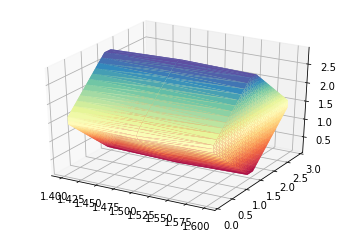

In [11]:
import numpy as np
from numpy import sin, cos, pi
from skimage import measure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def fun(x, y, z):
    return cos(x) + cos(y) + cos(z)

x, y, z = pi*np.mgrid[-1:1:31j, -1:1:31j, -1:1:31j]
vol = fun(x, y, z)
verts, faces, _, _ = measure.marching_cubes_lewiner(zerovol, 0, spacing=(0.1, 0.1, 0.1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                cmap='Spectral', lw=1)
plt.show()

In [8]:
testvol = np.mean(vol,2)
testvol.shape

(31, 31)

In [9]:
zerovol = np.zeros((31,31,31),dtype = np.float32)

In [10]:
zerovol[15,:,:] = testvol 

In [15]:
zerovol[15,:,:]

array([[-2.032258  , -2.0104058 , -1.9458035 , -1.8412751 , -1.7013887 ,
        -1.532258  , -1.3412751 , -1.1367866 , -0.9277296 , -0.7232411 ,
        -0.5322581 , -0.36312747, -0.22324108, -0.1187126 , -0.05411046,
        -0.03225806, -0.05411046, -0.1187126 , -0.22324108, -0.36312747,
        -0.5322581 , -0.7232411 , -0.9277296 , -1.1367866 , -1.3412751 ,
        -1.532258  , -1.7013887 , -1.8412751 , -1.9458035 , -2.0104058 ,
        -2.032258  ],
       [-2.0104058 , -1.9885533 , -1.9239511 , -1.8194226 , -1.6795362 ,
        -1.5104057 , -1.3194226 , -1.1149341 , -0.9058772 , -0.70138866,
        -0.51040566, -0.34127507, -0.20138867, -0.09686021, -0.03225806,
        -0.01040567, -0.03225806, -0.09686021, -0.20138867, -0.34127507,
        -0.51040566, -0.70138866, -0.9058772 , -1.1149341 , -1.3194226 ,
        -1.5104057 , -1.6795362 , -1.8194226 , -1.9239511 , -1.9885533 ,
        -2.0104058 ],
       [-1.9458035 , -1.9239511 , -1.859349  , -1.7548205 , -1.6149341 ,
       